In [123]:
import sqlite3
import pandas as pd
import tabulate
import mplfinance as mpf
import datetime as dt

In [124]:
# Import stocks data
spy_data = pd.read_csv("SPY.csv")

# Both data have the same column names, I'm going to rename some columns
spy_rename = spy_data.rename(columns={'close': 'spy_close', 'adjClose': 'spy_adjClose', 'divCash' : 'spy_divCash'})

# Add new column 'spy_diff' as the difference between spy_close and spy_adjClose
spy_rename['spy_diff'] = spy_rename['spy_close'] - spy_rename['spy_adjClose']

spy_rename.head(5)

,date,spy_close,high,low,open,volume,spy_adjClose,adjHigh,adjLow,adjOpen,adjVolume,spy_divCash,splitFactor,spy_diff
0,1993-01-29,43.9375,43.9687,43.7500,43.9687,1003200,24.367308,24.384612,24.263323,24.384612,1003200,0.0,1.0,19.570192
1,1993-02-01,44.2500,44.2500,43.9687,43.9687,480500,24.540618,24.540618,24.384612,24.384612,480500,0.0,1.0,19.709382
2,1993-02-02,44.3437,44.3750,44.1250,44.2187,201300,24.592583,24.609942,24.471294,24.523259,201300,0.0,1.0,19.751117
3,1993-02-03,44.8125,44.8437,44.3750,44.4062,529400,24.852575,24.869878,24.609942,24.627245,529400,0.0,1.0,19.959925
4,1993-02-04,45.0000,45.0937,44.4687,44.9687,531500,24.956560,25.008526,24.661907,24.939202,531500,0.0,1.0,20.043440


In [125]:
print(spy_rename.columns)
print(spy_rename.shape)
print(spy_rename.dtypes)

Index(['date', 'spy_close', 'high', 'low', 'open', 'volume', 'spy_adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'spy_divCash',
       'splitFactor', 'spy_diff'],
      dtype='object')
(8169, 14)
date             object
spy_close       float64
high            float64
low             float64
open            float64
volume            int64
spy_adjClose    float64
adjHigh         float64
adjLow          float64
adjOpen         float64
adjVolume         int64
spy_divCash     float64
splitFactor     float64
spy_diff        float64
dtype: object


In [126]:
# Checking missing values
spy_rename.isnull().values.any()

np.False_

Great! We don't have any missing value in our spy_raname dataset.

C:\Users\xzzlo\AppData\Local\Temp\ipykernel_6332\3924228802.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range['Open'] = date_range['open']
C:\Users\xzzlo\AppData\Local\Temp\ipykernel_6332\3924228802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_range['High'] = date_range['high']
C:\Users\xzzlo\AppData\Local\Temp\ipykernel_6332\3924228802.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

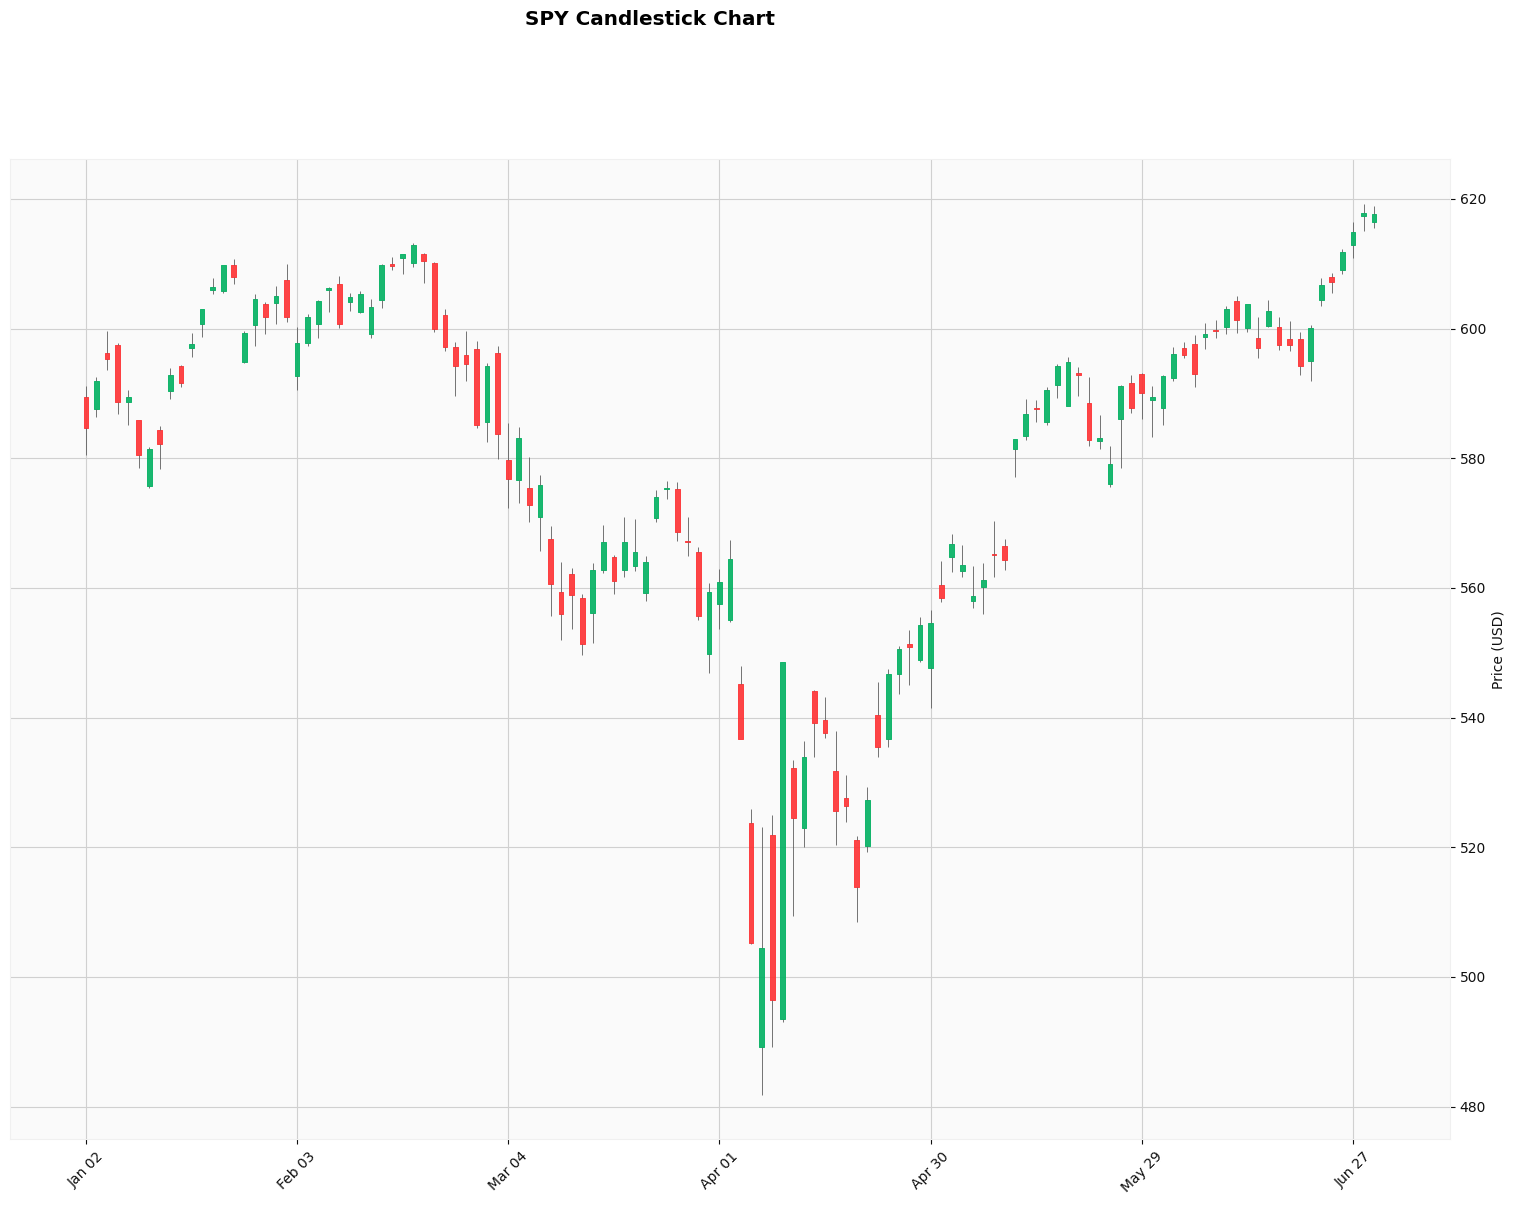

In [127]:
# Plot the open, high, low, close price of spy for data in 2025 using candlestick chart
spy_rename.columns = spy_rename.columns.str.strip()
spy_rename['date'] = pd.to_datetime(spy_rename['date'])
# Set the date column as the dataframe index
spy_rename.set_index('date', inplace=True)
date_range = spy_rename.loc['2025-01-01': '2025-07-01']
date_range['Open'] = date_range['open']
date_range['High'] = date_range['high']
date_range['Low'] = date_range['low']
date_range['Close'] = date_range['spy_close']

ohlc = date_range[['Open', 'High', 'Low', 'Close']]
mpf.plot(ohlc, type='candle', style='yahoo', title='SPY Candlestick Chart', ylabel='Price (USD)', volume=False, figsize=(20,14))

The candlestick chart shows the open, close, high and low prices for the time range from 2025-01-01 to 2025-07-01 for spy stock. Green means the close price is higher than open price. Red means the close price is lower than open price.

In [128]:
# Reset 'date' index to 'date' column
#from datetime import datetime
spy_rename = spy_rename.reset_index()
spy_rename['date'] = spy_rename['date'].dt.date
print(spy_rename.head(5))

         date  spy_close     high      low     open   volume  spy_adjClose  \
0  1993-01-29    43.9375  43.9687  43.7500  43.9687  1003200     24.367308   
1  1993-02-01    44.2500  44.2500  43.9687  43.9687   480500     24.540618   
2  1993-02-02    44.3437  44.3750  44.1250  44.2187   201300     24.592583   
3  1993-02-03    44.8125  44.8437  44.3750  44.4062   529400     24.852575   
4  1993-02-04    45.0000  45.0937  44.4687  44.9687   531500     24.956560   

     adjHigh     adjLow    adjOpen  adjVolume  spy_divCash  splitFactor  \
0  24.384612  24.263323  24.384612    1003200          0.0          1.0   
1  24.540618  24.384612  24.384612     480500          0.0          1.0   
2  24.609942  24.471294  24.523259     201300          0.0          1.0   
3  24.869878  24.609942  24.627245     529400          0.0          1.0   
4  25.008526  24.661907  24.939202     531500          0.0          1.0   

    spy_diff  
0  19.570192  
1  19.709382  
2  19.751117  
3  19.959925  
4  20

In [104]:
# Import bond data
tlt_data = pd.read_csv("tlt.csv")

# Both data have the same column names, I'm going to rename some columns
tlt_rename = tlt_data.rename(columns={'close': 'tlt_close', 'adjClose': 'tlt_adjClose', 'divCash': 'tlt_divCash'})

# Add new column 'tlt_diff' as the difference between tlt_close and tlt_adjClose
tlt_rename['tlt_diff'] = tlt_rename['tlt_close'] - tlt_rename['tlt_adjClose']

tlt_rename.head(5)

,date,tlt_close,high,low,open,volume,tlt_adjClose,adjHigh,adjLow,adjOpen,adjVolume,tlt_divCash,splitFactor,tlt_diff
0,2002-07-26,82.51,82.80,82.42,82.67,316300,37.841243,37.974245,37.799967,37.914623,316300,0.0,1.0,44.668757
1,2002-07-29,81.42,82.16,81.32,82.06,8400,37.341341,37.680724,37.295478,37.634861,8400,0.0,1.0,44.078659
2,2002-07-30,81.52,81.90,81.52,81.75,6100,37.387203,37.561481,37.387203,37.492687,6100,0.0,1.0,44.132797
3,2002-07-31,82.53,82.80,81.90,81.95,29400,37.850416,37.974245,37.561481,37.584413,29400,0.0,1.0,44.679584
4,2002-08-01,83.00,83.02,82.54,82.54,25000,38.065970,38.075143,37.855002,37.855002,25000,0.0,1.0,44.934030


In [99]:
print(tlt_rename.columns)
print(tlt_rename.shape)
print(tlt_rename.dtypes)

Index(['date', 'tlt_close', 'high', 'low', 'open', 'volume', 'tlt_adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'tlt_divCash',
       'splitFactor', 'tlt_diff'],
      dtype='object')
(5778, 14)
date             object
tlt_close       float64
high            float64
low             float64
open            float64
volume            int64
tlt_adjClose    float64
adjHigh         float64
adjLow          float64
adjOpen         float64
adjVolume         int64
tlt_divCash     float64
splitFactor     float64
tlt_diff        float64
dtype: object


In [100]:
# Checking missing values for tlt dataset
tlt_rename.isnull().values.any()

np.False_

Great! We don't have any missing value in our tlt_raname dataset.

In [117]:
# Create SQLite database and tables
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Create tables spy_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS spy (
   date TEXT NOT NULL PRIMARY KEY,
   spy_adjClose FLOAT NOT NULL             
);
""")

# Create tables tlt_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS tlt (
   date TEXT NOT NULL PRIMARY KEY,
   tlt_adjClose FLOAT NOT NULL             
);
""")

# Insert data into tables
spy_rename.to_sql("spy", conn, if_exists="replace", index=False)
tlt_rename.to_sql("tlt", conn, if_exists="replace", index=False)

# Verify data was inserted
print("SPY Table:\n")
print(pd.read_sql_query("SELECT * FROM spy", conn).head(5))

print("\nTLT Table:\n")
print(pd.read_sql_query("SELECT * FROM tlt", conn).head(5))



SPY Table:

         date  spy_close     high      low     open   volume  spy_adjClose  \
0  1993-01-29    43.9375  43.9687  43.7500  43.9687  1003200     24.367308   
1  1993-02-01    44.2500  44.2500  43.9687  43.9687   480500     24.540618   
2  1993-02-02    44.3437  44.3750  44.1250  44.2187   201300     24.592583   
3  1993-02-03    44.8125  44.8437  44.3750  44.4062   529400     24.852575   
4  1993-02-04    45.0000  45.0937  44.4687  44.9687   531500     24.956560   

     adjHigh     adjLow    adjOpen  adjVolume  spy_divCash  splitFactor  \
0  24.384612  24.263323  24.384612    1003200          0.0          1.0   
1  24.540618  24.384612  24.384612     480500          0.0          1.0   
2  24.609942  24.471294  24.523259     201300          0.0          1.0   
3  24.869878  24.609942  24.627245     529400          0.0          1.0   
4  25.008526  24.661907  24.939202     531500          0.0          1.0   

    spy_diff  
0  19.570192  
1  19.709382  
2  19.751117  
3  19.95

In [118]:
# Setting up query function
def query(query:str):
    return pd.read_sql(query, conn)

In [119]:
# Join two datasets. 
select_query = """
SELECT spy.date, spy_close, spy.spy_adjClose, spy.spy_divCash, spy_diff, tlt_close, tlt.tlt_adjClose, tlt.tlt_divCash, tlt_diff FROM spy
INNER JOIN tlt
    ON spy.date = tlt.date;
"""
final_data = query(select_query)

print(final_data.head(5))

         date  spy_close  spy_adjClose  spy_divCash   spy_diff  tlt_close  \
0  2002-07-26  85.599998     55.824445          0.0  29.775553      82.51   
1  2002-07-29  89.769997     58.543930          0.0  31.226067      81.42   
2  2002-07-30  90.940002     59.306954          0.0  31.633048      81.52   
3  2002-07-31  91.160004     59.450430          0.0  31.709574      82.53   
4  2002-08-01  88.779999     57.898298          0.0  30.881701      83.00   

   tlt_adjClose  tlt_divCash   tlt_diff  
0     37.841243          0.0  44.668757  
1     37.341341          0.0  44.078659  
2     37.387203          0.0  44.132797  
3     37.850416          0.0  44.679584  
4     38.065970          0.0  44.934030  


In [120]:
# Create tables final_data
cursor.execute("""
CREATE TABLE IF NOT EXISTS final_data (
   date TEXT NOT NULL PRIMARY KEY,
   spy_adjClose FLOAT NOT NULL,
   spy_divCash FLOAT NOT NULL,          
   tlt_adjClose FLOAT NOT NULL,
   tlt_divCash FLOAT NOT NULL         
);
""")

# Insert data into table
final_data.to_sql("final_data", conn, if_exists="replace", index=False)

# Verify data was inserted
print("final_data Table:\n")
print(pd.read_sql_query("SELECT * FROM final_data", conn).head(5))

final_data Table:

         date  spy_close  spy_adjClose  spy_divCash   spy_diff  tlt_close  \
0  2002-07-26  85.599998     55.824445          0.0  29.775553      82.51   
1  2002-07-29  89.769997     58.543930          0.0  31.226067      81.42   
2  2002-07-30  90.940002     59.306954          0.0  31.633048      81.52   
3  2002-07-31  91.160004     59.450430          0.0  31.709574      82.53   
4  2002-08-01  88.779999     57.898298          0.0  30.881701      83.00   

   tlt_adjClose  tlt_divCash   tlt_diff  
0     37.841243          0.0  44.668757  
1     37.341341          0.0  44.078659  
2     37.387203          0.0  44.132797  
3     37.850416          0.0  44.679584  
4     38.065970          0.0  44.934030  


In [121]:
final_data.to_csv('clean_data.csv', index=False)